# 9-10章 图神经网络
## 9.1图神经网络的相关基础知识。  
### 9.1.1欧氏空间和非欧氏空间  
欧氏空间：结构化的数据。  
非欧氏空间：最有代表的就是图结构。    
### 9.1.2图  
根据图顶点的特征或者图的结构特征进行分类。  
### 9.1.3图相关的术语和度量  
无向图，有向图，权，网，度。  
各顶点的度数的和是边的数量的两倍。  
顶点数：节点的数量。   
边数：边的数量。  
平均度：表示每个顶点连接边的平均数，如果图是无向图，那么平均度的计算为$2* edge / node$   
平均路径长度：任意两个顶点之间距离的平均值。它反映了网络中每个顶点间的分离程度。值越小代表网络中的顶点的连接度越大。   
模块化指数：衡量网络图结构的模块化程度。一般地，该值如果大于0.44就说明了网络图达到了一定的模块化程度。  
聚类系数：和平均路径程度一样能够展示所谓的小世界的效应，从而给出一些节点聚类。网络中的小世界特性是指网络节点的平均路径小。  
网络直径：网络图直径的最大测量长度，即任意两点间的最短距离构成的集合之中的最大值。    
### 9.1.4图神经网络  
GNN是一种直接在图上运行的神经网络，可以对图的结构数据进行基于节点特征或者结构特征的处理。   

## 9.2矩阵的基础  
### 9.2.1转置矩阵  
### 9.2.2对称矩阵及其特性  
### 9.2.3对角矩阵与单位矩阵  


In [1]:
import numpy as np
v = np.array([1,8,4])
print(np.diag(v))  # 生成对角矩阵  
print(np.eye(3))  # 生成三阶单位矩阵

[[1 0 0]
 [0 8 0]
 [0 0 4]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### 9.2.4哈达马积  
两个矩阵的对应位置上的元素进行相乘的结果。  
### 9.2.5点积  
即矩阵相乘。  
### 9.2.6对角矩阵的一些特性

In [2]:
# 对角矩阵与向量的互相转化
import numpy as np
a = np.diag([1,2,3])  # 生成对角矩阵
print(a)
v,e = np.linalg.eig(a) 
print(v)
print(e)
# 计算对角矩阵的3次方的4种方法
print(a*a*a)
print(a**3)
print((a**2)*a)
print(a@a@a)
"""对角矩阵的点积和哈达马积的结果都是一样的"""
a = np.diag([1,2,3])
print(a)
b = np.ones([3,3])
print(b)
print(a@b)

[[1 0 0]
 [0 2 0]
 [0 0 3]]
[1. 2. 3.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 1  0  0]
 [ 0  8  0]
 [ 0  0 27]]
[[ 1  0  0]
 [ 0  8  0]
 [ 0  0 27]]
[[ 1  0  0]
 [ 0  8  0]
 [ 0  0 27]]
[[ 1  0  0]
 [ 0  8  0]
 [ 0  0 27]]
[[1 0 0]
 [0 2 0]
 [0 0 3]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


### 9.2.7度矩阵与邻接矩阵 
度矩阵用来描述图中的每个节点所连接的边数。  
图的邻接矩阵用来描述图中每个节点的相邻关系。  
一般用D来表示度矩阵，A来表示邻接矩阵。    
## 9.3邻接矩阵的几种操作  
### 9.3.1获取有向图的短边和长边  
在有向图中，两个节点之间的边数最大为2.    
$E_{short}=W\circ (W\lt W^T)$  
$E_{long}=W\circ (W\gt W^T)$
### 9.3.2将有向图的邻接矩阵转化为无向图的邻接矩阵  
在图计算过程中，将有向图的邻接矩阵转化为无向图的邻接矩阵。一般来说保留图中的长边矩阵，并且把其中的单连接变成双向连接。  
无向图的邻接矩阵属于对称矩阵，在图关系顶点的分析中，它可以更加灵活地参与计算。  
实现有向图的邻接矩阵转化为无向图的邻接阵的办法是将长边矩阵加上长边矩阵的转置：  
$E_{symmetric} = E_{long} + E_{long}$  
## 9.4基于CORA数据集的基本案例  

In [3]:
from pathlib import Path
# 引入矩阵运算库
import numpy as np
import pandas as pd
from scipy.sparse import coo_matrix,csr_matrix,diags,eye
# 引入torch
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [4]:
paper_features_label = np.genfromtxt('DataSet\CORA\cora.content', dtype=np.str)
print(np.shape(paper_features_label))
#取出数据的第一列：论文的ID
papers = paper_features_label[:,0].astype(np.int32)
print(papers)
#为论文重新编号，{31336: 0, 1061127: 1,……
paper2idx = {k:v for v,k in enumerate(papers)}


#将数据中间部分的字标签取出，转化成矩阵
features = csr_matrix(paper_features_label[:, 1:-1], dtype=np.float32)
print(np.shape(features))
#将最后一项的论文分类属性取出，并转化为分类索引
labels = paper_features_label[:, -1]
lbl2idx = {k:v for v,k in enumerate(sorted(np.unique(labels)))}
labels = [lbl2idx[e] for e in labels]
print(lbl2idx,labels[:5])

<ipython-input-4-ca694b160338>:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  paper_features_label = np.genfromtxt('DataSet\CORA\cora.content', dtype=np.str)


(2708, 1435)
[  31336 1061127 1106406 ... 1128978  117328   24043]
(2708, 1433)
{'Case_Based': 0, 'Genetic_Algorithms': 1, 'Neural_Networks': 2, 'Probabilistic_Methods': 3, 'Reinforcement_Learning': 4, 'Rule_Learning': 5, 'Theory': 6} [2, 5, 4, 4, 3]


In [5]:
#读取论文关系数据，并将其转化为数组
edges = np.genfromtxt('DataSet\CORA\cora.cites', dtype=np.int32)
print(edges,np.shape(edges))
#转化为新编号节点间的关系
edges = np.asarray([paper2idx[e] for e in edges.flatten()], np.int32).reshape(edges.shape)
print(edges,edges.shape)

# 计算邻接矩阵（Adjacency matrix） ，行列都为论文个数
adj = coo_matrix((np.ones(edges.shape[0]), (edges[:, 0], edges[:, 1])),
                 shape=(len(labels), len(labels)), dtype=np.float32)
# Symmetric adjacency matrix
#adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)
#生成无向图对称矩阵
adj_long = adj.multiply(adj.T < adj)
adj = adj_long+adj_long.T

[[     35    1033]
 [     35  103482]
 [     35  103515]
 ...
 [ 853118 1140289]
 [ 853155  853118]
 [ 954315 1155073]] (5429, 2)
[[ 163  402]
 [ 163  659]
 [ 163 1696]
 ...
 [1887 2258]
 [1902 1887]
 [ 837 1686]] (5429, 2)


In [6]:
def normalize(mx):#定义函数，对矩阵数据进行归一化
    '''Row-normalize sparse matrix'''
    rowsum = np.array(mx.sum(1))#每一篇论文的字数
    r_inv = (rowsum ** -1).flatten() #取总字数的倒数
    r_inv[np.isinf(r_inv)] = 0.#将Nan值设为0
    r_mat_inv = diags(r_inv)#将总字数的倒数做成对角矩阵
    mx = r_mat_inv.dot(mx)#左乘一个矩阵，相当于每个元素除以总数
    return mx

#对 features矩阵进行归一化（每行的总和为1）
features = normalize(features)


# 对邻接矩阵对角线添加1，将其变为自循环图。同时再对其进行归一化
adj = normalize(adj + eye(adj.shape[0]))

In [7]:
# Data as tensors
adj = torch.FloatTensor(adj.todense()) #节点间的关系
features = torch.FloatTensor(features.todense())#节点自身的特征
labels = torch.LongTensor(labels) #每个节点的分类标签

#划分数据集
n_train = 200
n_val = 300
n_test = len(features) - n_train - n_val
np.random.seed(34)
idxs = np.random.permutation(len(features))#将原有索引打乱顺序
#计算每个数据集的索引
idx_train = torch.LongTensor(idxs[:n_train])
idx_val   = torch.LongTensor(idxs[n_train:n_train+n_val])
idx_test  = torch.LongTensor(idxs[n_train+n_val:])
adj = adj.to(device)
features = features.to(device)
labels = labels.to(device)
idx_train = idx_train.to(device)
idx_val = idx_val.to(device)
idx_test = idx_test.to(device)

图卷积的本质是维度变换，将每个含有in维的节点特征数据变换成out维的节点特征数据。   
图卷积的操作是将输入的节点特征、权重参数、加工后的邻接矩阵三者放在一起执行点积运算。  
权重参数可以被理解为一个全连接网络的权重，只不过在图卷积中，比全连接网络多了执行节点关系信息的点积运算。  


In [8]:
def mish(x):					#Mish激活函数
    return x *( torch.tanh(F.softplus(x)))

#图卷积类
class GraphConvolution(nn.Module):
    def __init__(self, f_in, f_out, use_bias=True, activation= mish):
        super().__init__()
        self.f_in = f_in
        self.f_out = f_out
        self.use_bias = use_bias
        self.activation = activation
        self.weight = nn.Parameter(torch.FloatTensor(f_in, f_out))
        self.bias = nn.Parameter(torch.FloatTensor(f_out)) if use_bias else None
        self.initialize_weights()
        
    def initialize_weights(self):
        """对参数进行初始化"""
        if self.activation is None: 
            nn.init.xavier_uniform_(self.weight)
        else: 
            nn.init.kaiming_uniform_(self.weight, nonlinearity='leaky_relu')
        if self.use_bias: #初始化偏置
            nn.init.zeros_(self.bias)
        
    def forward(self, input, adj):
        support = torch.mm(input, self.weight)
        output = torch.mm(adj, support)
        if self.use_bias: 
            output.add_(self.bias)
        
        if self.activation is not None: 
            output = self.activation(output)
        return output

In [9]:
class GCN(nn.Module):
    def __init__(self, f_in, n_classes, hidden=[16], dropout_p=0.5):
        super().__init__()
        layers = []
        for f_in,f_out in zip([f_in]+hidden[:-1], hidden):
            layers += [GraphConvolution(f_in, f_out)]
            
        self.layers = nn.Sequential(*layers)
        self.dropout_p = dropout_p
        
        self.out_layer = GraphConvolution(f_out, n_classes, activation=None)
        
    def forward(self, x, adj):
        for layer in self.layers:
            x = layer(x, adj)
        F.dropout(x, self.dropout_p, training=self.training, inplace=True) #函数方式调用dropout必须用training标志
                        
        return self.out_layer(x, adj)

In [10]:
n_labels = labels.max().item() + 1  #分类个数 7
n_features = features.shape[1]   #节点个数 1433
print(n_labels, n_features)

7 1433


In [11]:
def accuracy(output,y):
    return (output.argmax(1) == y).type(torch.float32).mean().item()

def step():
    model.train()
    optimizer.zero_grad()
    output = model(features, adj)
    loss = F.cross_entropy(output[idx_train], labels[idx_train])
    acc = accuracy(output[idx_train], labels[idx_train])
    loss.backward()
    optimizer.step()
    return loss.item(), acc

def evaluate(idx):
    model.eval()
    output = model(features, adj)
    loss = F.cross_entropy(output[idx], labels[idx]).item()
    return loss, accuracy(output[idx], labels[idx])


  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\Alctrain\Desktop\毕业设计\GNN_Learn\Book1\ranger.py:125: UserWarning: This overload of addcmul_ is deprecated:
	addcmul_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcmul_(Tensor tensor1, Tensor tensor2, *, Number value) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:1050.)
  exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
  4%|▍         | 42/1000 [00:00<08:40,  1.84it/s]

     1/1000: train_loss=1.9406, train_acc=0.1850, val_loss=1.9423, val_acc=0.1400
    50/1000: train_loss=1.9353, train_acc=0.2500, val_loss=1.9357, val_acc=0.2733


 18%|█▊        | 177/1000 [00:01<02:34,  5.33it/s]

   100/1000: train_loss=1.9246, train_acc=0.2750, val_loss=1.9229, val_acc=0.3400
   150/1000: train_loss=1.9120, train_acc=0.2600, val_loss=1.9081, val_acc=0.3200


 26%|██▋       | 264/1000 [00:01<01:08, 10.74it/s]

   200/1000: train_loss=1.8941, train_acc=0.2500, val_loss=1.8867, val_acc=0.3200
   250/1000: train_loss=1.8722, train_acc=0.2500, val_loss=1.8607, val_acc=0.3167


 35%|███▌      | 353/1000 [00:01<00:30, 21.37it/s]

   300/1000: train_loss=1.8494, train_acc=0.2500, val_loss=1.8344, val_acc=0.3167
   350/1000: train_loss=1.8196, train_acc=0.2500, val_loss=1.8034, val_acc=0.3233


 49%|████▉     | 488/1000 [00:01<00:08, 56.91it/s]

   400/1000: train_loss=1.7816, train_acc=0.2600, val_loss=1.7696, val_acc=0.3300
   450/1000: train_loss=1.7350, train_acc=0.3200, val_loss=1.7326, val_acc=0.3833


 58%|█████▊    | 578/1000 [00:02<00:04, 102.58it/s]

   500/1000: train_loss=1.6572, train_acc=0.4700, val_loss=1.6743, val_acc=0.4800
   550/1000: train_loss=1.5413, train_acc=0.5400, val_loss=1.5853, val_acc=0.5000


 66%|██████▋   | 665/1000 [00:02<00:02, 166.36it/s]

   600/1000: train_loss=1.4059, train_acc=0.5450, val_loss=1.4792, val_acc=0.5133
   650/1000: train_loss=1.2313, train_acc=0.5550, val_loss=1.3445, val_acc=0.5067


 75%|███████▌  | 754/1000 [00:02<00:01, 244.31it/s]

   700/1000: train_loss=1.0637, train_acc=0.6450, val_loss=1.2168, val_acc=0.5600
   750/1000: train_loss=0.9339, train_acc=0.7100, val_loss=1.1124, val_acc=0.6267


 84%|████████▍ | 845/1000 [00:02<00:00, 316.77it/s]

   800/1000: train_loss=0.8093, train_acc=0.7700, val_loss=1.0184, val_acc=0.6700
   850/1000: train_loss=0.6979, train_acc=0.8100, val_loss=0.9438, val_acc=0.6900


 98%|█████████▊| 978/1000 [00:03<00:00, 386.73it/s]

   900/1000: train_loss=0.6088, train_acc=0.8500, val_loss=0.8877, val_acc=0.7467
   950/1000: train_loss=0.5184, train_acc=0.9000, val_loss=0.8414, val_acc=0.7567


100%|██████████| 1000/1000 [00:03<00:00, 326.11it/s]


  1000/1000: train_loss=0.4429, train_acc=0.9350, val_loss=0.8080, val_acc=0.7700
Train     : loss=0.4429, accuracy=0.9350
Validation: loss=0.8080, accuracy=0.7700
Test      : loss=0.9106, accuracy=0.7228
                 Real                   Pred
0     Neural_Networks        Neural_Networks
1     Neural_Networks  Probabilistic_Methods
2  Genetic_Algorithms     Genetic_Algorithms
3          Case_Based  Probabilistic_Methods
4              Theory          Rule_Learning
5     Neural_Networks        Neural_Networks
6     Neural_Networks        Neural_Networks
7  Genetic_Algorithms     Genetic_Algorithms
8     Neural_Networks             Case_Based
9     Neural_Networks  Probabilistic_Methods


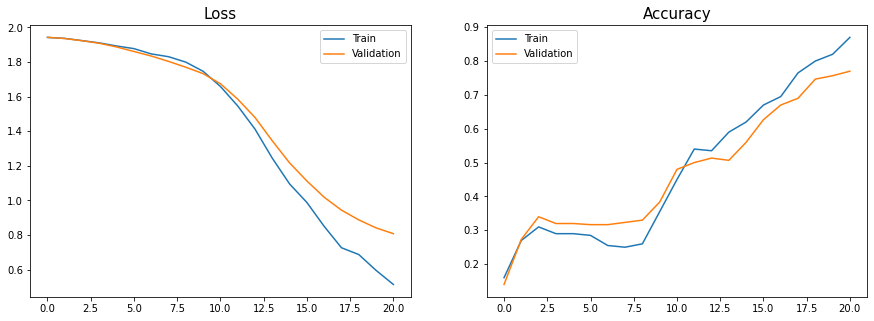

In [12]:
model = GCN(n_features, n_labels, hidden=[16, 32, 16]).to(device)


from ranger import *
optimizer = Ranger(model.parameters())




from tqdm import tqdm  #pip install tqdm
#训练模型
epochs = 1000#400#500

print_steps = 50
train_loss, train_acc = [], []
val_loss, val_acc = [], []
for i in tqdm(range(epochs)):
    tl, ta = step()
    train_loss += [tl]
    train_acc += [ta]
    if (i+1)%print_steps == 0 or i == 0:
        tl, ta = evaluate(idx_train)
        vl, va = evaluate(idx_val)
        val_loss += [vl]
        val_acc += [va]
        print(f'{i+1:6d}/{epochs}: train_loss={tl:.4f}, train_acc={ta:.4f}'+
              f', val_loss={vl:.4f}, val_acc={va:.4f}')

#输出最终结果
final_train, final_val, final_test = evaluate(idx_train), evaluate(idx_val), evaluate(idx_test)
print(f'Train     : loss={final_train[0]:.4f}, accuracy={final_train[1]:.4f}')
print(f'Validation: loss={final_val[0]:.4f}, accuracy={final_val[1]:.4f}')
print(f'Test      : loss={final_test[0]:.4f}, accuracy={final_test[1]:.4f}')


#可视化训练过程
fig, axes = plt.subplots(1, 2, figsize=(15,5))
ax = axes[0]
axes[0].plot(train_loss[::print_steps] + [train_loss[-1]], label='Train')
axes[0].plot(val_loss, label='Validation')
axes[1].plot(train_acc[::print_steps] + [train_acc[-1]], label='Train')
axes[1].plot(val_acc, label='Validation')
for ax,t in zip(axes, ['Loss', 'Accuracy']): ax.legend(), ax.set_title(t, size=15)



#输出模型预测结果
output = model(features, adj)

samples = 10
idx_sample = idx_test[torch.randperm(len(idx_test))[:samples]]

idx2lbl = {v:k for k,v in lbl2idx.items()}
df = pd.DataFrame({'Real': [idx2lbl[e] for e in labels[idx_sample].tolist()],
                   'Pred': [idx2lbl[e] for e in output[idx_sample].argmax(1).tolist()]})
print(df)

In [1]:
import torch
print(torch.version.cuda)

11.3
